# load the data




In [21]:
import pandas as pd
import numpy as np

tennis_data = pd.read_csv("./tennisdatafinal.csv")


In [22]:
import sklearn.model_selection as ms


X = tennis_data[['player1_rank', 'player2_rank']]

y = tennis_data['player1_win']


X_train, X_test, y_train, y_test = ms.train_test_split(X, y, 
                                                       test_size=1.0/10, random_state=0)


# Fit a logistic regression model to the rankings (two features)

In [15]:
from sklearn import linear_model
logit_ranking = linear_model.LogisticRegression()
logit_ranking.set_params(C=1e4)

#x_training_rank = tennis_data[["player1_rank","player2_rank"]]
#y_training_rank = tennis_data["player1_win"]

logit_ranking.fit(X_train, y_train)

logit_ranking.score(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6634517531686558

In [17]:
print(logit_ranking.intercept_)
print(logit_ranking.coef_)

[-0.01791029]
[[-0.00531648  0.00547621]]


In [16]:
logit_ranking.score(X_test,y_test)

0.6543852345267832

# Plot the decision boundary of the logistic regression model

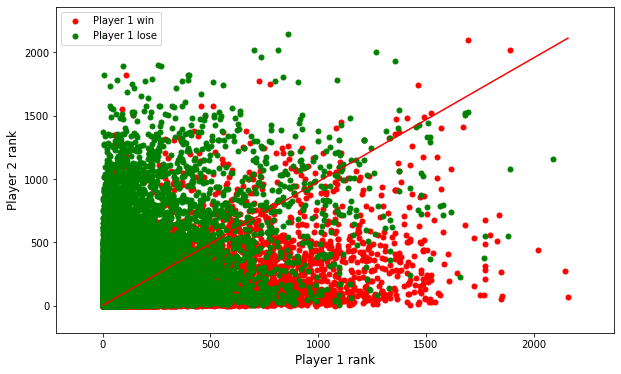

In [12]:
from PlottingFunction import data_2Dplot, logistic_model_2Dplot, plotModel
import matplotlib.pyplot as plt
# Plot data points
plt.figure(figsize=(10, 6))
data_2Dplot(x_training_rank, y_training_rank, \
            legends=["Player 1 win", "Player 1 lose"], \
            xlabel="Player 1 rank", ylabel="Player 2 rank")

# Plot decision boundary
#logistic_model_2Dplot(scores, decision_logit)
logistic_model_2Dplot(x_training_rank, logit_ranking)
plt.show()

# Fit a LDA model to the ranking features

In [23]:
from sklearn import discriminant_analysis

LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LDA.score(X_train, y_train)

0.6633283991735283

In [24]:
LDA.score(X_test,y_test)

0.6546627810158201

# Plot the decision boundary of the LDA model

F:\NYC_Data_Science_Academy\Online_course\projects\capstone\PlottingFunction.py:167: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')


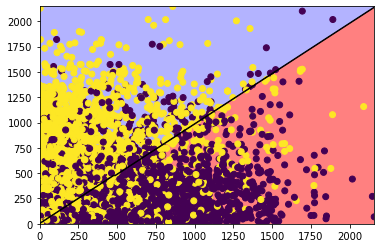

In [20]:
plotModel(LDA, x_training_rank["player1_rank"], x_training_rank["player2_rank"], y_training_rank)

In [20]:
#samples = [[1,10], [500,498]]
#LDA.predict(samples)
print(LDA.intercept_)
print(LDA.coef_)


[-0.01243001]
[[-0.00371185  0.00378285]]


# Fit a logisitic regression model on four features

In [2]:
#four features are player1rank, player2_rank, player1_wins, player2_wins

from sklearn import linear_model
logit_ranking = linear_model.LogisticRegression()
logit_ranking.set_params(C=1e4)

x_training_rank = tennis_data[["player1_rank","player2_rank", "player1_h2h", "player2_h2h"]]
y_training_rank = tennis_data["player1_win"]

logit_ranking.fit(x_training_rank, y_training_rank)

print(logit_ranking.score(x_training_rank, y_training_rank))

print(logit_ranking.intercept_)
print(logit_ranking.coef_)



C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6554607271718013
[-0.01581855]
[[-0.00503728  0.0051557   0.18378148 -0.18522482]]


# Fit a LDA model to four features

In [3]:
from sklearn import discriminant_analysis

LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(x_training_rank, y_training_rank)

LDA.score(x_training_rank, y_training_rank)

0.6524424091035248

# Import full feature dataset and get rid of columns where stats are 0

In [4]:
full_feature_dataset = pd.read_csv("./tennisdatafinalpost1999.csv")



full_feature_dataset_reduced = full_feature_dataset.loc[~((full_feature_dataset['player1_acepercent'] == 0) & (full_feature_dataset['player1_dbfaultper']==0) & (full_feature_dataset['player1_1stserveper'] == 0) & (full_feature_dataset['player1_2ndserveper']==0)),:]
full_feature_dataset_reduced = full_feature_dataset_reduced.loc[~((full_feature_dataset_reduced['player2_acepercent'] == 0) & (full_feature_dataset_reduced['player2_dbfaultper']==0) & (full_feature_dataset_reduced['player2_1stserveper'] == 0) & (full_feature_dataset_reduced['player2_2ndserveper']==0)),:]
full_feature_dataset_reduced = full_feature_dataset_reduced.loc[~(full_feature_dataset_reduced["surface"] == "None"),:]


# Create new dataframe

In [5]:
tennis_dataset_final = full_feature_dataset_reduced[["surface", "winner_name", "loser_name", "winner_hand", "loser_hand", "winner_hand",\
                                              "loser_hand", "winner_ht", "loser_ht", "winner_age", "loser_age", "player1_1stserveper",\
                                              "player2_1stserveper", "player1_acepercent", "player2_acepercent", "player1_2ndserveper",\
                                              "player2_2ndserveper", "player1_dbfaultper", "player2_dbfaultper", "player1_win", "player1_h2h", "player2_h2h",\
                                                    "player1_name", "player2_name", "player1_rank", "player2_rank"]]

tennis_dataset_final.dropna(inplace = True)
tennis_dataset_final.reset_index(inplace = True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


# Dummify surface variable

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


label = LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore')

surface_labelencoded = label.fit_transform(tennis_dataset_final['surface'])

surface_labelencoded = surface_labelencoded.reshape(len(surface_labelencoded),1)

x = enc.fit_transform(surface_labelencoded)

enc.get_feature_names()
x = x.toarray()

surface_dataframe = pd.DataFrame(x)
surface_dataframe.columns = ["carpet","clay", "grass", "hard"]


surface_dataframe


,carpet,clay,grass,hard
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,1.0


# Change winner and loser columns to player 1, player 2

In [7]:
tennis_dataset_final["player1_ht"] = [tennis_dataset_final["winner_ht"][x] if(tennis_dataset_final["winner_name"][x] == tennis_dataset_final["player1_name"][x])\
else tennis_dataset_final["loser_ht"][x] for x in range(tennis_dataset_final.shape[0])] 
        
    

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
tennis_dataset_final["player2_ht"] = [tennis_dataset_final["winner_ht"][x] if(tennis_dataset_final["winner_name"][x] == tennis_dataset_final["player2_name"][x])\
else tennis_dataset_final["loser_ht"][x] for x in range(tennis_dataset_final.shape[0])] 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
tennis_dataset_final["player1_age"] = [tennis_dataset_final["winner_age"][x] if(tennis_dataset_final["winner_name"][x] == tennis_dataset_final["player1_name"][x])\
else tennis_dataset_final["loser_age"][x] for x in range(tennis_dataset_final.shape[0])] 


tennis_dataset_final["player2_age"] = [tennis_dataset_final["winner_age"][x] if(tennis_dataset_final["winner_name"][x] == tennis_dataset_final["player2_name"][x])\
else tennis_dataset_final["loser_age"][x] for x in range(tennis_dataset_final.shape[0])] 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
tennis_dataset_final = pd.concat([tennis_dataset_final,surface_dataframe], axis = 1)

#tennis_dataset_final['carpet']


In [11]:
tennis_dataset_final.to_csv("./tennis_dataset_final.csv", index = None, header=True)

# Load the dataset and select the features

In [8]:
fullfeature_dataset = pd.read_csv("./tennis_dataset_final.csv")

X = fullfeature_dataset[['player1_1stserveper', "player2_1stserveper", "player1_acepercent", "player2_acepercent",\
                                          "player1_2ndserveper", "player2_2ndserveper", "player1_dbfaultper", "player2_dbfaultper",\
                                         "player1_h2h", "player2_h2h", "player1_ht", "player2_ht", "player1_age", "player2_age",\
                                        "carpet", "clay", "grass", "hard"]]

y = fullfeature_dataset['player1_win']


# Fit a Random Forest to the "full" dataset

In [14]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

randomForest.set_params(random_state=42, n_estimators=100, max_features=4)
randomForest.fit(X, y) # fit 
randomForest.score(X,y) # accuracy




0.9999390949509714